In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
cad = pd.read_csv('GMU_2021_Summer_CAD.csv')
avl = pd.read_csv('GMU_2021_Summer_AVL.csv')
avl.columns = ['AVL_IncidentNumber',
               'AVL_UnitID',
               'AVL_Timestamp',
               'AVL_UnitStatus',
               'AVL_Speed']
avl.dropna(subset = ['AVL_IncidentNumber'],
           inplace = True)
avl.reset_index(inplace = True, drop = True)
avl.isna().sum()

AVL_IncidentNumber    0
AVL_UnitID            0
AVL_Timestamp         0
AVL_UnitStatus        0
AVL_Speed             0
dtype: int64

In [3]:
# convert object to timestamp proper
avl['AVL_Timestamp'] = avl['AVL_Timestamp'].str.replace('ED', '')
cad['CAD_Timestamp'] = cad['CAD_Timestamp'].str.replace('ED', '')
avl['AVL_Timestamp'] = avl['AVL_Timestamp'].str.replace('ES', '')
cad['CAD_Timestamp'] = cad['CAD_Timestamp'].str.replace('ES', '')
avl['AVL_Timestamp'] = pd.to_datetime(avl['AVL_Timestamp'], format = '%Y%m%d%H%M%S')
cad['CAD_Timestamp'] = pd.to_datetime(cad['CAD_Timestamp'], format = '%Y%m%d%H%M%S')

In [4]:
#Create separate data sets of TA and TR to then be joined to to form "TransportTime" entry
cad_ta = cad[cad['CAD_UnitStatus'].isin(['TA'])]
cad_tr= cad[cad['CAD_UnitStatus'].isin(['TR'])]
avl_ta = avl[avl['AVL_UnitStatus'].isin(['TA'])]
avl_tr= avl[avl['AVL_UnitStatus'].isin(['TR'])]

In [5]:
cad_ta=cad_ta.rename(columns={"CAD_IncidentNumber":"cad_ta_IncidentNumber","CAD_UnitID":"cad_ta_UnitID","CAD_Timestamp":"cad_ta_Timestamp", "CAD_UnitStatus":"cad_ta_UnitStatus"})
cad_tr=cad_tr.rename(columns={"CAD_IncidentNumber":"cad_tr_IncidentNumber","CAD_UnitID":"cad_tr_UnitID","CAD_Timestamp":"cad_tr_Timestamp", "CAD_UnitStatus":"cad_tr_UnitStatus"})

avl_ta=avl_ta.rename(columns={"AVL_IncidentNumber":"avl_ta_IncidentNumber","AVL_UnitID":"avl_ta_UnitID","AVL_Timestamp":"avl_ta_Timestamp", "AVL_UnitStatus":"avl_ta_UnitStatus", "AVL_Speed":"avl_ta_Speed"})
avl_tr=avl_tr.rename(columns={"AVL_IncidentNumber":"avl_tr_IncidentNumber","AVL_UnitID":"avl_tr_UnitID","AVL_Timestamp":"avl_tr_Timestamp", "AVL_UnitStatus":"avl_tr_UnitStatus", "AVL_Speed":"avl_tr_Speed"})

In [6]:
#Create the FullKey to make sure the first time entry for the ER and DP status are being taken
cad_ta['cad_ta_FullKey'] = cad_ta['cad_ta_IncidentNumber'].map(str) +  cad_ta['cad_ta_UnitID'].map(str)
cad_tr['cad_tr_FullKey'] = cad_tr['cad_tr_IncidentNumber'].map(str) +  cad_tr['cad_tr_UnitID'].map(str)

avl_ta['avl_ta_FullKey'] = avl_ta['avl_ta_IncidentNumber'].map(str) +  avl_ta['avl_ta_UnitID'].map(str)
avl_tr['avl_tr_FullKey'] = avl_tr['avl_tr_IncidentNumber'].map(str) +  avl_tr['avl_tr_UnitID'].map(str)



In [7]:
#sort both dataframes by timestamp so when dups are removed taking the first time stamp
cad_ta.sort_values(by='cad_ta_Timestamp', ascending=True)
cad_tr.sort_values(by='cad_tr_Timestamp', ascending=True)

avl_ta.sort_values(by='avl_ta_Timestamp', ascending=True)
avl_tr.sort_values(by='avl_tr_Timestamp', ascending=True)

#Remove duplicates from each dataframe, so each unit ID is only DP or ER to an incident once
cad_ta_NEW = cad_ta.drop_duplicates(subset='cad_ta_FullKey', keep="first", inplace=False)
cad_tr_NEW = cad_tr.drop_duplicates(subset='cad_tr_FullKey', keep="first", inplace=False)

avl_ta_NEW = avl_ta.drop_duplicates(subset='avl_ta_FullKey', keep="first", inplace=False)
avl_tr_NEW = avl_tr.drop_duplicates(subset='avl_tr_FullKey', keep="first", inplace=False)

In [8]:
#For Validation confirm that there are NOT currently duplicate values
dups_cad_ta_NEW = cad_ta_NEW.pivot_table(index = ['cad_ta_FullKey'], aggfunc ='size').sort_values(ascending=False)
print(dups_cad_ta_NEW)
dups_cad_tr_NEW = cad_tr_NEW.pivot_table(index = ['cad_tr_FullKey'], aggfunc ='size').sort_values(ascending=False)
print(dups_cad_tr_NEW)

dups_avl_ta_NEW = avl_ta_NEW.pivot_table(index = ['avl_ta_FullKey'], aggfunc ='size').sort_values(ascending=False)
print(dups_avl_ta_NEW)
dups_avl_tr_NEW = avl_tr_NEW.pivot_table(index = ['avl_tr_FullKey'], aggfunc ='size').sort_values(ascending=False)
print(dups_avl_tr_NEW)

cad_ta_FullKey
70018M401          1
E192250323M441     1
E192241788M429     1
E192241809M408B    1
E192241841M423     1
                  ..
E181162102M431     1
E181162102M436     1
E181162129M432     1
E181162147M409     1
E203662343M436     1
Length: 213606, dtype: int64
cad_tr_FullKey
E163662548M404     1
E192250212M440     1
E192242785M414B    1
E192242789M430     1
E192242796M432     1
                  ..
E181162428M409     1
E181162449M413     1
E181162459M432     1
E181162484M426     1
E203662343M436     1
Length: 215192, dtype: int64
avl_ta_FullKey
E163662437M429     1
E192382531M425     1
E192382360M422     1
E192382372M421     1
E192382401M410B    1
                  ..
E181100066M440     1
E181100081M430     1
E181100090M404     1
E181100094M405E    1
E203662343M436     1
Length: 178278, dtype: int64
avl_tr_FullKey
E163662548M404     1
E192221356M419     1
E192221365M422     1
E192221368E401     1
E192221368M429     1
                  ..
E181011056M410B    1
E181011063M44

In [9]:
#join the CAD data framaes together and then the AVL dataframes together
df_cad = cad_tr_NEW.merge(cad_ta_NEW, 
               how = 'inner', 
               left_on = ['cad_tr_IncidentNumber',
                          'cad_tr_UnitID'],
               right_on = ['cad_ta_IncidentNumber',
                           'cad_ta_UnitID'],
               suffixes = ('cad_tr', 'cad_ta'))

df_avl = avl_tr_NEW.merge(avl_ta_NEW, 
               how = 'inner', 
               left_on = ['avl_tr_IncidentNumber',
                          'avl_tr_UnitID'],
               right_on = ['avl_ta_IncidentNumber',
                           'avl_ta_UnitID'],
               suffixes = ('avl_tr', 'avl_ta'))

In [10]:
# create TransportTime col in merged dataframe
df_cad['cad_Timestamp_Transport'] = abs(df_cad['cad_ta_Timestamp'] - df_cad['cad_tr_Timestamp'])

df_avl['avl_Timestamp_Transport'] = abs(df_avl['avl_ta_Timestamp'] - df_avl['avl_tr_Timestamp'])

In [11]:
#convert the turnout time into seconds for simplier analysis (5 minutes =300)
df_CADless5mins = df_cad[df_cad['cad_Timestamp_Transport'].dt.total_seconds() <= 300]
df_AVLless5mins = df_avl[df_avl['avl_Timestamp_Transport'].dt.total_seconds() <= 300]

In [12]:
df_cad.info()
df_CADless5mins.info()
22937/213598

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213598 entries, 0 to 213597
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   cad_tr_IncidentNumber    213598 non-null  object         
 1   cad_tr_UnitID            213598 non-null  object         
 2   cad_tr_Timestamp         213598 non-null  datetime64[ns] 
 3   cad_tr_UnitStatus        213598 non-null  object         
 4   cad_tr_FullKey           213598 non-null  object         
 5   cad_ta_IncidentNumber    213598 non-null  object         
 6   cad_ta_UnitID            213598 non-null  object         
 7   cad_ta_Timestamp         213598 non-null  datetime64[ns] 
 8   cad_ta_UnitStatus        213598 non-null  object         
 9   cad_ta_FullKey           213598 non-null  object         
 10  cad_Timestamp_Transport  213598 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), object(8), timedelta64[ns](1)
memory usage:

0.10738396426932836

In [13]:
twentyfiveCAD = df_cad.cad_Timestamp_Transport.quantile(0.25)
fiftyCAD = df_cad.cad_Timestamp_Transport.quantile(0.5)
ninetyCAD = df_cad.cad_Timestamp_Transport.quantile(0.9)
print ("\n25th Percentile: ", twentyfiveCAD)
print ("\n50th Percentile: ", fiftyCAD)
print ("\n90th Percentile: ", ninetyCAD)


25th Percentile:  0 days 00:07:32

50th Percentile:  0 days 00:11:02

90th Percentile:  0 days 00:20:42


In [14]:
twentyfiveAVL = df_avl.avl_Timestamp_Transport.quantile(0.25)
fiftyAVL = df_avl.avl_Timestamp_Transport.quantile(0.5)
ninetyAVL = df_avl.avl_Timestamp_Transport.quantile(0.9)
print ("\n25th Percentile: ", twentyfiveAVL)
print ("\n50th Percentile: ", fiftyAVL)
print ("\n90th Percentile: ", ninetyAVL)


25th Percentile:  0 days 00:12:34

50th Percentile:  0 days 00:18:58

90th Percentile:  0 days 00:47:42


In [15]:
df_avl.info()
df_AVLless5mins.info()
6522/173494

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173494 entries, 0 to 173493
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   avl_tr_IncidentNumber    173494 non-null  object         
 1   avl_tr_UnitID            173494 non-null  object         
 2   avl_tr_Timestamp         173494 non-null  datetime64[ns] 
 3   avl_tr_UnitStatus        173494 non-null  object         
 4   avl_tr_Speed             173494 non-null  object         
 5   avl_tr_FullKey           173494 non-null  object         
 6   avl_ta_IncidentNumber    173494 non-null  object         
 7   avl_ta_UnitID            173494 non-null  object         
 8   avl_ta_Timestamp         173494 non-null  datetime64[ns] 
 9   avl_ta_UnitStatus        173494 non-null  object         
 10  avl_ta_Speed             173494 non-null  object         
 11  avl_ta_FullKey           173494 non-null  object         
 12  av

0.03759207811221137

In [16]:
df_ALL = df_avl.merge(df_cad, 
               how = 'inner', 
               left_on = ['avl_ta_FullKey'],
               right_on = ['cad_ta_FullKey'],
               suffixes = ('avl_ta', 'cad_ta'))

In [17]:
df_ALL['CAD_vs_AVL_Transport'] = abs(df_ALL['avl_Timestamp_Transport'] - df_ALL['cad_Timestamp_Transport'])

In [18]:
twentyfiveALL = df_ALL.CAD_vs_AVL_Transport.quantile(0.25)
fiftyALL = df_ALL.CAD_vs_AVL_Transport.quantile(0.5)
ninetyALL = df_ALL.CAD_vs_AVL_Transport.quantile(0.9)
print ("\n25th Percentile: ", twentyfiveALL)
print ("\n50th Percentile: ", fiftyALL)
print ("\n90th Percentile: ", ninetyALL)


25th Percentile:  0 days 00:01:03

50th Percentile:  0 days 00:08:10

90th Percentile:  0 days 00:33:38


In [19]:
equal = df_ALL[df_ALL['CAD_vs_AVL_Transport'].isin(['0 days 00:00:00'])]
equal.info()
df_ALL.info()
523/173494

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 1093 to 173213
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   avl_tr_IncidentNumber    523 non-null    object         
 1   avl_tr_UnitID            523 non-null    object         
 2   avl_tr_Timestamp         523 non-null    datetime64[ns] 
 3   avl_tr_UnitStatus        523 non-null    object         
 4   avl_tr_Speed             523 non-null    object         
 5   avl_tr_FullKey           523 non-null    object         
 6   avl_ta_IncidentNumber    523 non-null    object         
 7   avl_ta_UnitID            523 non-null    object         
 8   avl_ta_Timestamp         523 non-null    datetime64[ns] 
 9   avl_ta_UnitStatus        523 non-null    object         
 10  avl_ta_Speed             523 non-null    object         
 11  avl_ta_FullKey           523 non-null    object         
 12  avl_Timestamp_Tr

0.0030145134702064627

In [20]:
dfALL_less60 = df_ALL[df_ALL['CAD_vs_AVL_Transport'].dt.total_seconds() <= 60]
dfALL_less60.info()
41922/173494

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41922 entries, 1 to 173492
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   avl_tr_IncidentNumber    41922 non-null  object         
 1   avl_tr_UnitID            41922 non-null  object         
 2   avl_tr_Timestamp         41922 non-null  datetime64[ns] 
 3   avl_tr_UnitStatus        41922 non-null  object         
 4   avl_tr_Speed             41922 non-null  object         
 5   avl_tr_FullKey           41922 non-null  object         
 6   avl_ta_IncidentNumber    41922 non-null  object         
 7   avl_ta_UnitID            41922 non-null  object         
 8   avl_ta_Timestamp         41922 non-null  datetime64[ns] 
 9   avl_ta_UnitStatus        41922 non-null  object         
 10  avl_ta_Speed             41922 non-null  object         
 11  avl_ta_FullKey           41922 non-null  object         
 12  avl_Timestamp_Tra

0.24163371643976161

In [21]:
dfALL_less10 = df_ALL[df_ALL['CAD_vs_AVL_Transport'].dt.total_seconds() <= 10]
dfALL_less10.info()
9190/173494

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9190 entries, 28 to 173492
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   avl_tr_IncidentNumber    9190 non-null   object         
 1   avl_tr_UnitID            9190 non-null   object         
 2   avl_tr_Timestamp         9190 non-null   datetime64[ns] 
 3   avl_tr_UnitStatus        9190 non-null   object         
 4   avl_tr_Speed             9190 non-null   object         
 5   avl_tr_FullKey           9190 non-null   object         
 6   avl_ta_IncidentNumber    9190 non-null   object         
 7   avl_ta_UnitID            9190 non-null   object         
 8   avl_ta_Timestamp         9190 non-null   datetime64[ns] 
 9   avl_ta_UnitStatus        9190 non-null   object         
 10  avl_ta_Speed             9190 non-null   object         
 11  avl_ta_FullKey           9190 non-null   object         
 12  avl_Timestamp_Tra

0.05297013153192617

In [22]:
###creating subset of CAD transport is 5 mins or less
dfALL_CADless5 = df_ALL[df_ALL['cad_Timestamp_Transport'].dt.total_seconds() <= 300]

In [23]:
twentyfive_CADless5 = dfALL_CADless5.CAD_vs_AVL_Transport.quantile(0.25)
fifty_CADless5 = dfALL_CADless5.CAD_vs_AVL_Transport.quantile(0.5)
ninety_CADless5 = dfALL_CADless5.CAD_vs_AVL_Transport.quantile(0.9)
print ("\n25th Percentile: ", twentyfive_CADless5)
print ("\n50th Percentile: ", fifty_CADless5)
print ("\n90th Percentile: ", ninety_CADless5)


25th Percentile:  0 days 00:00:52

50th Percentile:  0 days 00:08:27

90th Percentile:  0 days 00:32:02


In [24]:
equal_under5 = dfALL_CADless5[dfALL_CADless5['CAD_vs_AVL_Transport'].isin(['0 days 00:00:00'])]
equal_under5.info()
dfALL_CADless5.info()
74/15696

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 2236 to 171002
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   avl_tr_IncidentNumber    74 non-null     object         
 1   avl_tr_UnitID            74 non-null     object         
 2   avl_tr_Timestamp         74 non-null     datetime64[ns] 
 3   avl_tr_UnitStatus        74 non-null     object         
 4   avl_tr_Speed             74 non-null     object         
 5   avl_tr_FullKey           74 non-null     object         
 6   avl_ta_IncidentNumber    74 non-null     object         
 7   avl_ta_UnitID            74 non-null     object         
 8   avl_ta_Timestamp         74 non-null     datetime64[ns] 
 9   avl_ta_UnitStatus        74 non-null     object         
 10  avl_ta_Speed             74 non-null     object         
 11  avl_ta_FullKey           74 non-null     object         
 12  avl_Timestamp_Tra

0.004714576962283384

In [30]:
dfALL_CADless5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15696 entries, 15 to 173492
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   avl_tr_IncidentNumber    15696 non-null  object         
 1   avl_tr_UnitID            15696 non-null  object         
 2   avl_tr_Timestamp         15696 non-null  datetime64[ns] 
 3   avl_tr_UnitStatus        15696 non-null  object         
 4   avl_tr_Speed             15696 non-null  object         
 5   avl_tr_FullKey           15696 non-null  object         
 6   avl_ta_IncidentNumber    15696 non-null  object         
 7   avl_ta_UnitID            15696 non-null  object         
 8   avl_ta_Timestamp         15696 non-null  datetime64[ns] 
 9   avl_ta_UnitStatus        15696 non-null  object         
 10  avl_ta_Speed             15696 non-null  object         
 11  avl_ta_FullKey           15696 non-null  object         
 12  avl_Timestamp_Tr

In [29]:
dfALL_CADless5['Apparatus'] = dfALL_CADless5['avl_tr_UnitID'].astype(str).str[0]

<ipython-input-29-29b7de28938b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfALL_CADless5['Apparatus'] = dfALL_CADless5['avl_tr_UnitID'].astype(str).str[0]


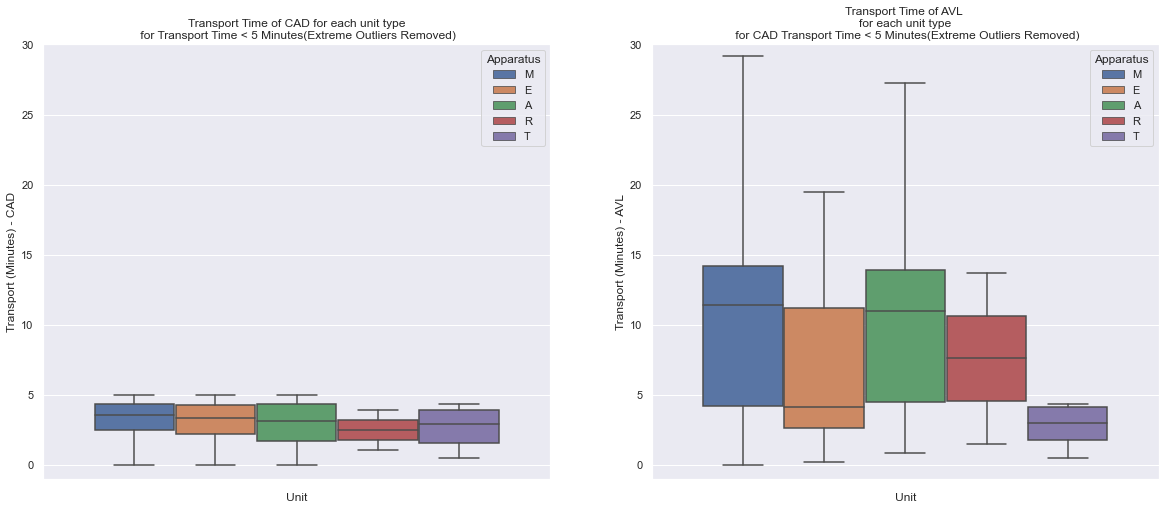

In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))

sns.boxplot(y = dfALL_CADless5['cad_Timestamp_Transport'].dt.total_seconds()/60, x = [""] * len(dfALL_CADless5), hue=dfALL_CADless5['Apparatus'],
                 showfliers = False,ax=ax1)
sns.set(rc={'figure.figsize':(10,10)})

sns.boxplot(y = dfALL_CADless5['avl_Timestamp_Transport'].dt.total_seconds()/60, x = [""] * len(dfALL_CADless5), hue=dfALL_CADless5['Apparatus'],
                 showfliers = False,ax=ax2)
sns.set(rc={'figure.figsize':(10,10)})

ax1.set_xlabel('Unit')
ax1.set_ylabel('Transport (Minutes) - CAD')
ax2.set_xlabel('Unit')
ax2.set_ylabel('Transport (Minutes) - AVL')
ax1.set_title('Transport Time of CAD for each unit type\n for Transport Time < 5 Minutes(Extreme Outliers Removed)')
ax2.set_title('Transport Time of AVL \nfor each unit type\n for CAD Transport Time < 5 Minutes(Extreme Outliers Removed)')
ax1.set_ylim([-1, 30])
ax2.set_ylim([-1, 30])

plt.show()

In [40]:
engines = df_ALL[df_ALL['Apparatus'].isin(['E'])]
medics= df_ALL[df_ALL['Apparatus'].isin(['M'])]
trucks = df_ALL[df_ALL['Apparatus'].isin(['T'])]
rescueSquad= df_ALL[df_ALL['Apparatus'].isin(['R'])]
ambulance= df_ALL[df_ALL['Apparatus'].isin(['A'])]

In [39]:
df_ALL['Apparatus'] = df_ALL['avl_tr_UnitID'].astype(str).str[0]

In [42]:
ninetyEngines = engines.cad_Timestamp_Transport.quantile(0.9)
print ("\n90th Percentile for Engines Turnout (CAD): ", ninetyEngines)


ninetyEnginesA = engines.avl_Timestamp_Transport.quantile(0.9)
print ("\n90th Percentile for Engines Turnout (AVL): ", ninetyEnginesA)



90th Percentile for Engines Turnout (CAD):  0 days 00:23:13

90th Percentile for Engines Turnout (AVL):  0 days 00:28:44.900000


In [43]:

ninetyMedics = medics.cad_Timestamp_Transport.quantile(0.9)

print ("\n90th Percentile for Medics Turnout (CAD): ", ninetyMedics)


ninetyMedicsA = medics.avl_Timestamp_Transport.quantile(0.9)

print ("\n90th Percentile for Medics Turnout (AVL): ", ninetyMedicsA)


90th Percentile for Medics Turnout (CAD):  0 days 00:20:41

90th Percentile for Medics Turnout (AVL):  0 days 00:47:52


In [44]:

ninetyTrucks = trucks.cad_Timestamp_Transport.quantile(0.9)

print ("\n90th Percentile for Trucks Turnout (CAD): ", ninetyTrucks)


ninetyTrucksA = trucks.avl_Timestamp_Transport.quantile(0.9)

print ("\n90th Percentile for Trucks Turnout (AVL): ", ninetyTrucksA)


90th Percentile for Trucks Turnout (CAD):  0 days 00:20:12

90th Percentile for Trucks Turnout (AVL):  0 days 00:22:04.200000


In [45]:

ninetyRescueSquad = rescueSquad.cad_Timestamp_Transport.quantile(0.9)

print ("\n90th Percentile for RescueSquad Turnout (CAD): ", ninetyRescueSquad)


ninetyRescueSquadA = rescueSquad.avl_Timestamp_Transport.quantile(0.9)

print ("\n90th Percentile for RescueSquad Turnout (AVL): ", ninetyRescueSquadA)


90th Percentile for RescueSquad Turnout (CAD):  0 days 00:25:11.500000

90th Percentile for RescueSquad Turnout (AVL):  0 days 00:31:48


In [46]:

ninetyAmbulance = ambulance.cad_Timestamp_Transport.quantile(0.9)

print ("\n90th Percentile for Ambulance Turnout (CAD): ", ninetyAmbulance)


ninetyAmbulanceA = ambulance.avl_Timestamp_Transport.quantile(0.9)

print ("\n90th Percentile for Ambulance Turnout (AVL): ", ninetyAmbulanceA)


90th Percentile for Ambulance Turnout (CAD):  0 days 00:20:40.600000

90th Percentile for Ambulance Turnout (AVL):  0 days 00:44:25.800000
